In [1]:
# transistor parameters

vth = 0.4 # V
uncox = 170e-6 # A/V^2
lambdan = 0.18 # 1/V
cgs_w_l130nm = 1.19*1e-15/1e-6 # F/m
cgd_w_l130nm = 0.65*1e-15/1e-6 # F/m
cdb_w = 0.31*1e-15/1e-6 # F/m
csb_w = 0.4*1e-15/1e-6 # F/m
cov_w = 300/500*1e-15/1e-6 # F/m

In [2]:
# lsk modulator modeling

import numpy as np
import matplotlib.pyplot as plt


Ls = 47e-9
Rs = 0.471
f_sr = 1870e6
f_center = 433e6
q_ind = 289 #q_coil

# initial values of Msw
widthn = np.array([0.5e-6,1e-6,5e-6,10e-6,20e-6,50e-6]) # m
lengthn = 0.13e-6 # m
vgs = 1.2 # V

cgs = cgs_w_l130nm*widthn
cgd = cgd_w_l130nm*widthn
cdb = cdb_w*widthn
csb = csb_w*widthn
cov = cov_w*widthn

c1off = (cdb + csb + 2*cov)/2

c1on = (cdb + csb + cgd + cgs)/2

Ron = 1/(uncox*(widthn/lengthn)*(vgs-vth))

# unit cap = cb
pi_value = 3.14159
c_par = 1/(Ls * (2*pi_value*f_sr)**2)

q_ind_est = 2*pi_value*f_center*Ls/Rs

Rp_ind = Rs*(1+q_ind**2)
c_res = 1/((2*pi_value*f_center)**2 * Ls)
print('c_res = ' + str(c_res))

f0 = 1/(2*pi_value*np.sqrt(Ls*c_res))
f0mod = 1/(2*pi_value*np.sqrt(Ls*(c_res+(c1on-c1off)/2)))

Req = Rp_ind*Ron/(Rp_ind+Ron)

z_rlc_p_mod_mag = 1/np.sqrt(np.square(1/Req) + np.square(2*pi_value*f_center*(c_res+(c1on-c1off)/2)-1/(2*pi_value*f_center*Ls)))

print('c_par = ' + str(c_par))
print('q_ind = ' + str(q_ind))
print('q_ind_est = ' + str(q_ind_est))
print('Rp_ind = ' + str(Rp_ind))
print('f0 = ' + str(f0))
print('f0mod = ' + str(f0mod))
print('Ron = ' + str(Ron))
print('Req = ' + str(Req))
print('z_rlc_p_mod_mag = ' + str(z_rlc_p_mod_mag))


c_res = 2.8745333146704837e-12
c_par = 1.54120328472148e-13
q_ind = 289
q_ind_est = 271.48406832271763
Rp_ind = 39338.862
f0 = 433000000.0
f0mod = [4.32993975e+08 4.32987950e+08 4.32939759e+08 4.32879544e+08
 4.32759188e+08 4.32398722e+08]
Ron = [1911.76470588  955.88235294  191.17647059   95.58823529   47.79411765
   19.11764706]
Req = [1823.16376615  933.2066644   190.25189666   95.35653153   47.73612141
   19.1083609 ]
z_rlc_p_mod_mag = [1823.16362261  933.20658741  190.25188035   95.35652331   47.73611729
   19.10835925]


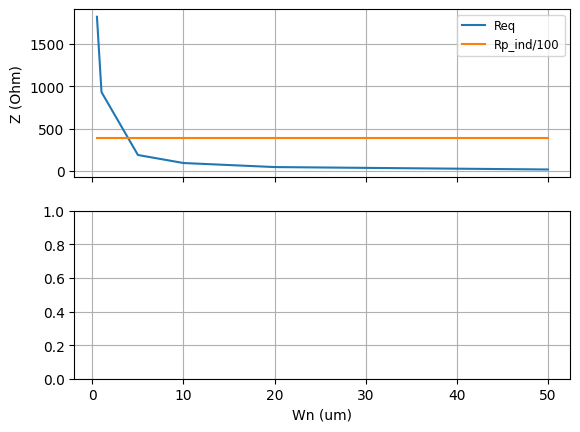

In [4]:
# ID vs VDS
fig, axs = plt.subplots(2,1,sharex='col')

#axs[0].set_title('sg13_lv_nmos (L=0.5um, VGS=0.75V)')
axs[0].plot(widthn*1e6, Req, label='Req')
axs[0].plot(widthn*1e6, Rp_ind*np.array([1,1,1,1,1,1])/100, label='Rp_ind/100')
axs[0].set_ylabel('Z (Ohm)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')
axs[1].set_xlabel('Wn (um)')
axs[1].grid()

plt.show()

In [6]:
# output W
if Rp_ind>10e3:
    factor=100
elif Rp_ind>5e3:
    factor=50
else:
    factor=10

widthn_val = np.interp(Rp_ind/factor,np.flip(Req),np.flip(widthn))
print('widthn_val = ' + str(widthn_val))
print('widthn_val/2 = ' + str(widthn_val/2))

widthn_val = 3.906330602299193e-06
widthn_val/2 = 1.9531653011495966e-06
